In [7]:
import requests
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from Fantasy import Fantasy

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)
json = response.json()


In [3]:
# due to FDR
unwanted_teams = []

higher_than_zero = ['value_season', 'form', 'value_form', 'minutes']

fpl = Fantasy(json, unwanted_teams, higher_than_zero)


# Aggregate

In [3]:
# Avg value per position
fpl.createPivot('element_type', 'value_season').head()

,element_type,value_season
2,Goalkeeper,15.904348
0,Defender,12.344860
3,Midfielder,10.284211
1,Forward,9.091111


In [4]:
# Avg value per team
fpl.createPivot('team', 'value_season').head()

,team,value_season
11,Man City,15.142857
10,Liverpool,13.700000
18,West Ham,13.693333
6,Crystal Palace,13.185714
0,Arsenal,13.162500


In [5]:
# Avg form per team
fpl.createPivot('team', 'form').head()

,team,form
6,Crystal Palace,4.321429
10,Liverpool,4.017647
11,Man City,4.000000
16,Spurs,3.866667
5,Chelsea,3.589474


# Top players overall

In [6]:
# Sorting by value season
fpl.getPlayerDf().sort_values('value_season', ascending=False).head(10)


,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
679,Coady,Wolves,Defender,49,2686.0,25.1,123,4.8,1.0
700,Malheiro de Sá,Wolves,Goalkeeper,53,2700.0,24.7,131,3.8,0.7
406,Cancelo,Man City,Defender,69,2417.0,23.5,162,6.7,1.0
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,6.3,1.3
371,Ramses Becker,Liverpool,Goalkeeper,60,2430.0,23.0,138,8.0,1.3
32,Ramsdale,Arsenal,Goalkeeper,51,2160.0,22.9,117,3.0,0.6
25,White,Arsenal,Defender,45,2340.0,22.9,103,4.0,0.9
56,Cash,Aston Villa,Defender,53,2567.0,22.6,120,8.0,1.5
658,Bowen,West Ham,Midfielder,68,2361.0,22.5,153,1.0,0.1
432,de Gea,Man Utd,Goalkeeper,51,2610.0,22.2,113,1.5,0.3


In [7]:
# Sorting by form
fpl.getPlayerDf().sort_values('form', ascending=False).head(10)


,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
208,Havertz,Chelsea,Midfielder,79,1300.0,10.8,85,11.0,1.4
84,Toney,Brentford,Forward,67,2188.0,16.3,109,10.3,1.5
566,Kane,Spurs,Forward,125,2421.0,10.9,136,10.0,0.8
212,Chalobah,Chelsea,Defender,47,1177.0,17.7,83,8.7,1.9
221,Guaita,Crystal Palace,Goalkeeper,46,2115.0,19.3,89,8.5,1.8
457,dos Santos Aveiro,Man Utd,Forward,122,1914.0,9.6,117,8.5,0.7
377,Alexander-Arnold,Liverpool,Defender,85,2313.0,22.0,187,8.3,1.0
56,Cash,Aston Villa,Defender,53,2567.0,22.6,120,8.0,1.5
374,Robertson,Liverpool,Defender,73,1934.0,19.5,142,8.0,1.1
371,Ramses Becker,Liverpool,Goalkeeper,60,2430.0,23.0,138,8.0,1.3


# Top per filtered

In [8]:
column = 'element_type'
element = 'Defender'

In [9]:
# Value
fpl.dfFiltered(column, element, 'value_season').head(10)

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
679,Coady,Wolves,Defender,49,2686.0,25.1,123,4.8,1.0
406,Cancelo,Man City,Defender,69,2417.0,23.5,162,6.7,1.0
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,6.3,1.3
25,White,Arsenal,Defender,45,2340.0,22.9,103,4.0,0.9
56,Cash,Aston Villa,Defender,53,2567.0,22.6,120,8.0,1.5
689,Kilman,Wolves,Defender,46,2508.0,22.2,102,2.2,0.5
20,Magalhães,Arsenal,Defender,53,2196.0,22.1,117,4.0,0.8
369,van Dijk,Liverpool,Defender,68,2430.0,22.1,150,6.7,1.0
377,Alexander-Arnold,Liverpool,Defender,85,2313.0,22.0,187,8.3,1.0
409,Laporte,Man City,Defender,58,2082.0,21.2,123,5.0,0.9


In [10]:
# Form
fpl.dfFiltered(column, element, 'form').head(10)

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
212,Chalobah,Chelsea,Defender,47,1177.0,17.7,83,8.7,1.9
377,Alexander-Arnold,Liverpool,Defender,85,2313.0,22.0,187,8.3,1.0
56,Cash,Aston Villa,Defender,53,2567.0,22.6,120,8.0,1.5
374,Robertson,Liverpool,Defender,73,1934.0,19.5,142,8.0,1.1
406,Cancelo,Man City,Defender,69,2417.0,23.5,162,6.7,1.0
369,van Dijk,Liverpool,Defender,68,2430.0,22.1,150,6.7,1.0
237,Mitchell,Crystal Palace,Defender,45,2601.0,20.0,90,6.5,1.4
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,6.3,1.3
243,Clyne,Crystal Palace,Defender,43,541.0,4.7,20,6.0,1.4
242,Andersen,Crystal Palace,Defender,45,2104.0,17.6,79,6.0,1.3


# Distribution

array([[<AxesSubplot:title={'center':'value_form'}>]], dtype=object)

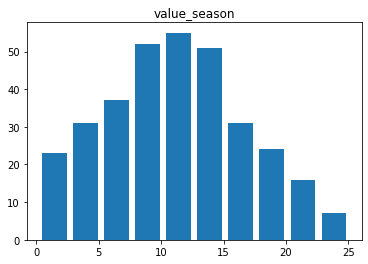

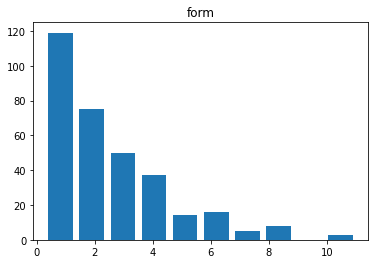

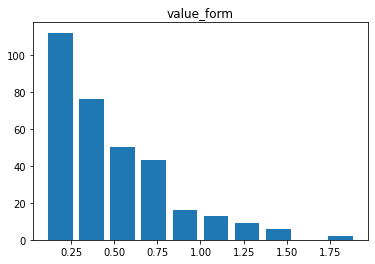

In [11]:
# Getting a feeling for distribution
fpl.getPlayerDf().hist(column='value_season', bins=10, grid=False, rwidth=.8)
fpl.getPlayerDf().hist(column='form', bins=10, grid=False, rwidth=.8)
fpl.getPlayerDf().hist(column='value_form', bins=10, grid=False, rwidth=.8)

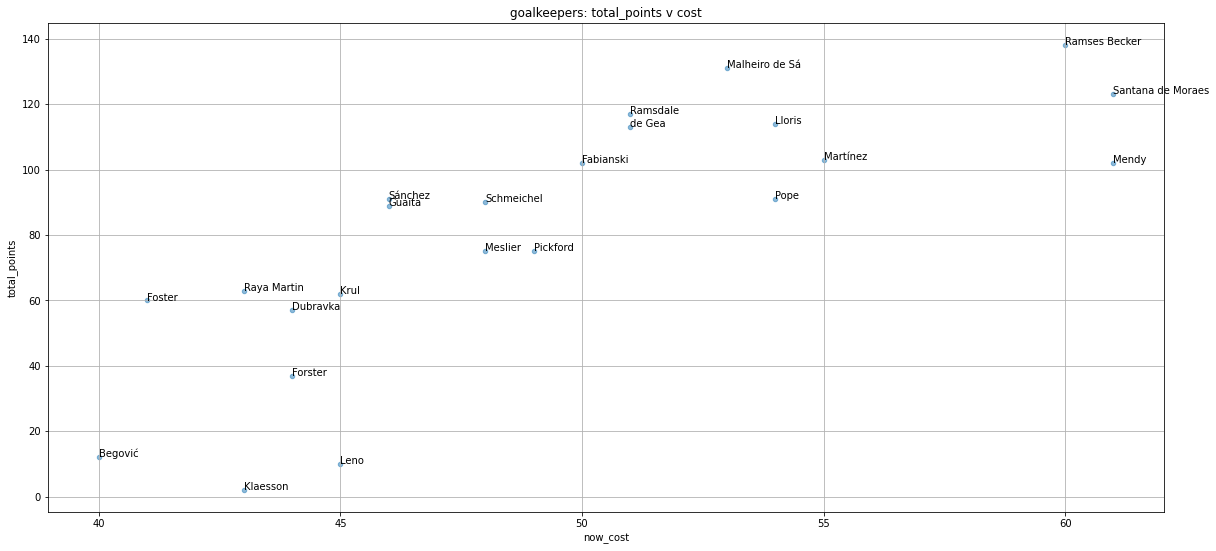

In [9]:
gk_df = fpl.dfFiltered('element_type', 'Goalkeeper', 'value_season')

ax = gk_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="goalkeepers: total_points v cost")
for i, txt in enumerate(gk_df.second_name):
    ax.annotate(txt, (gk_df.now_cost.iat[i],gk_df.total_points.iat[i]))

plt.grid(which='both', axis='both', ls='-')
plt.show()